# K means clustering using Country data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [37]:
df=pd.read_csv('C:/Users/Bagavathi Priya/Downloads/Countries-exercise.csv')

In [38]:
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


# Plotting the data

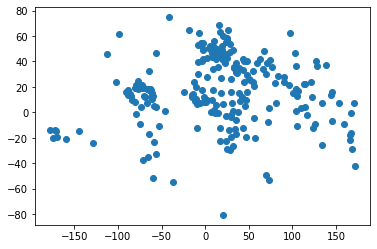

In [6]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

**From this figure, we can see that the data are not clustered in a clear manner,for that we have to do practise with many number of clusters**

# K means clustering

In [7]:
kmean=KMeans(n_clusters=2,random_state=42,max_iter=4,verbose=1)

In [8]:
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=4,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=1)

In [10]:
x=df.iloc[:,1:3]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [11]:
kmean.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 748479.686764708
start iteration
done sorting
end inner loop
Iteration 1, inertia 742322.8095697523
start iteration
done sorting
end inner loop
Iteration 2, inertia 737558.8002292388
start iteration
done sorting
end inner loop
Iteration 3, inertia 735802.5829900963
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 954214.1696564339
start iteration
done sorting
end inner loop
Iteration 1, inertia 662973.2402377063
start iteration
done sorting
end inner loop
Iteration 2, inertia 657012.0797586325
start iteration
done sorting
end inner loop
Iteration 3, inertia 657012.0797586325
center shift 0.000000e+00 within tolerance 2.933319e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 747000.2436947321
start iteration
done sorting
end inner loop
Iteration 1, inertia 735340.2573585937
start iteration
done sorting
end inner loop

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=4,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=1)

In [13]:
lab=kmean.labels_

In [14]:
df['cluster']=lab
df.head()

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


## Visualizing the clusters from model

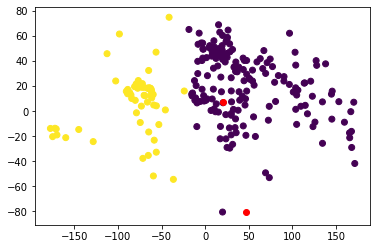

In [18]:
plt.scatter(df['Longitude'],df['Latitude'],c=df['cluster'])
plt.scatter(kmean.cluster_centers_[0],kmean.cluster_centers_[1],color='red')
plt.show()

**We cannot say this is the correct number of clusters for the data, we use elbow method, to find the best no of cluster**

# Elbow method

In [16]:
kmean.cluster_centers_

array([[ 47.00167125,  20.74869417],
       [-80.44181589,   6.83554125]])

In [19]:
kmean.inertia_

657012.0797586325

**Inertia is the sum of squared distances of samples to their closest cluster center.**

In [21]:
N=11
inertias=[]

for i in range(1,N+1):
    kmeans=KMeans(i)
    kmeans.fit(x)
    inert=kmeans.inertia_
    inertias.append(inert)

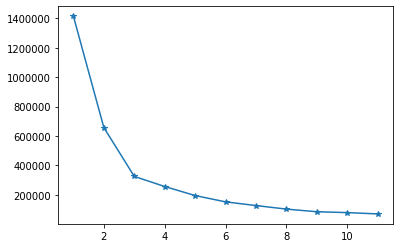

In [25]:
clusters=range(1,N+1)
plt.plot(clusters,inertias,'*-')

**The elbow point from the diagram is 3, so that would be the best no of cluster for this data**

# Kmeans with n_cluster=3

In [29]:
kmean=KMeans(n_clusters=3)

In [30]:
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
lab=kmean.labels_

In [39]:
df['cluster']=lab

In [40]:
df.head()

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


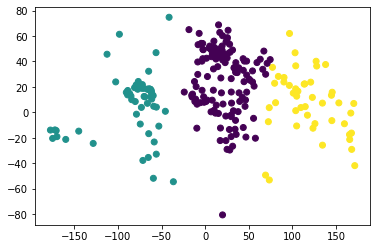

In [43]:
plt.scatter(df['Longitude'],df['Latitude'],c=df['cluster'])

#plt.scatter(kmean.cluster_centers_[0],kmean.cluster_centers_[1],kmean.cluster_centers_[2],color='red')

plt.show()

## Now the clusters are predicted by the model correctly